In [56]:
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
from matplotlib import style
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle, os

In [57]:
#read the data in the csv
data = pd.read_csv('student-mat.csv', sep=';')


In [58]:
data = data[['G1','G2','G3','studytime','failures' ,'absences']]
label = 'G3'
x = np.array(data.drop(columns = [label], axis =1))
y = np.array(data[label])
# # Check shapes before splitting
# print("Shape of x:", x.shape)
# print("Shape of y:", y.shape)

In [62]:


# Initialize the model score
model_score = 0  # Initialize to 0
model = 'studentmodel.pickle'

# Check if the model file exists
if os.path.exists(model):
    # Open the pickle file and load the model and its score
    with open(model, 'rb') as pickle_in:
        prevmodel, best = pickle.load(pickle_in)  # Unpack the model and score
    linear = prevmodel
    print(f"Best Score: {best}")  # Now `best` holds the score of the model
else:
    # If the model doesn't exist, initialize the linear model
    linear = linear_model.LinearRegression()

# Iterate to train the model
for _ in range(30000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    
    # Fit the model
    linear.fit(x_train, y_train)
    
    # Calculate accuracy
    acc = linear.score(x_test, y_test)
    
    # Check if the current accuracy is better than the best score
    if acc > best:
        best = acc  # Update best score
        print(f"{_} -: better version found... saved: \n{acc}")
        
        # Save both the model and the best score
        with open(model, 'wb') as f:
            pickle.dump((linear, best), f)  # Save both model and score

print('completed--')


Best Score: 0.9754830528018837
completed--


Text(0, 0.5, 'final grade')

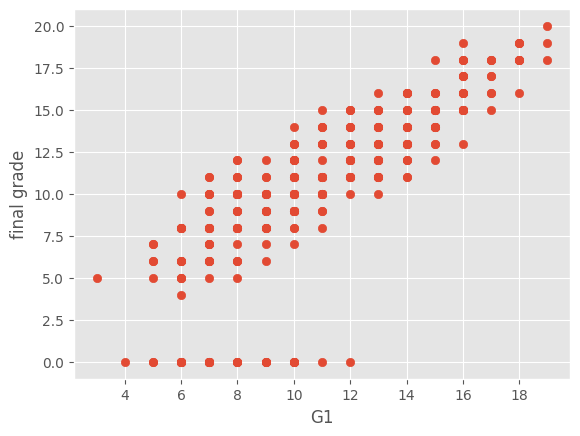

In [64]:
style.use('ggplot')
p='G1'
pyplot.scatter(data[p],data[label])
pyplot.xlabel(p)
pyplot.ylabel('final grade')